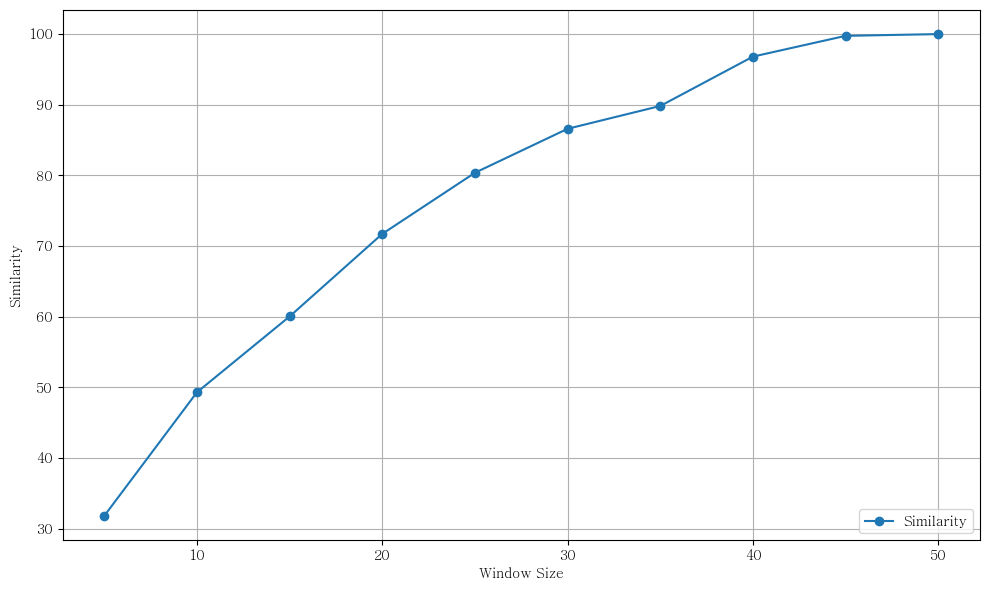

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm

# CSV 파일들이 저장된 폴더 경로
folder_path = './result/check'

# 윈도우 크기 리스트 (파일 이름에 따라 조정 가능)
window_sizes = list(range(5, 55, 5))  # 5부터 50까지 5 간격
file_names = [f'window_{w}_0.85_0.1.csv' for w in window_sizes]

# 유사도 저장 리스트
similarities = []

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    try:
        df = pd.read_csv(file_path)
        # 고대-ori.txt 와 고대-5.txt 조합 필터
        row = df[(df['file1'] == '고대-ori.txt') & (df['file2'] == '고대-5.txt')]
        if not row.empty:
            similarity = float(row['similarity'].values[0])
        else:
            similarity = None
    except Exception as e:
        similarity = None  # 파일이 없거나 에러 발생 시 None 처리

    similarities.append(similarity)

font_candidates = ['AppleMyungjo', 'Batang', 'NanumMyeongjo']
selected_font = None

for font in font_candidates:
    if any(font in f.name for f in fm.fontManager.ttflist):
        selected_font = font
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font


# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, similarities, marker='o', linestyle='-', label='Similarity')
plt.xlabel('Window Size')
plt.ylabel('Similarity')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('./result/check/window_5_0.85_0.75.csv', encoding='utf-8')

# 그룹 기준: 파일명 앞 두 글자
def get_group(filename):
    return filename[:2]

df['group1'] = df['file1'].apply(get_group)
df['group2'] = df['file2'].apply(get_group)

# 조건에 따라 분류
TP = df[(df['group1'] == df['group2']) & (df['label'] == 1)].shape[0]
FN = df[(df['group1'] == df['group2']) & (df['label'] == 0)].shape[0]
FP = df[(df['group1'] != df['group2']) & (df['label'] == 1)].shape[0]
TN = df[(df['group1'] != df['group2']) & (df['label'] == 0)].shape[0]

# 지표 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Accuracy: 0.8889
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000


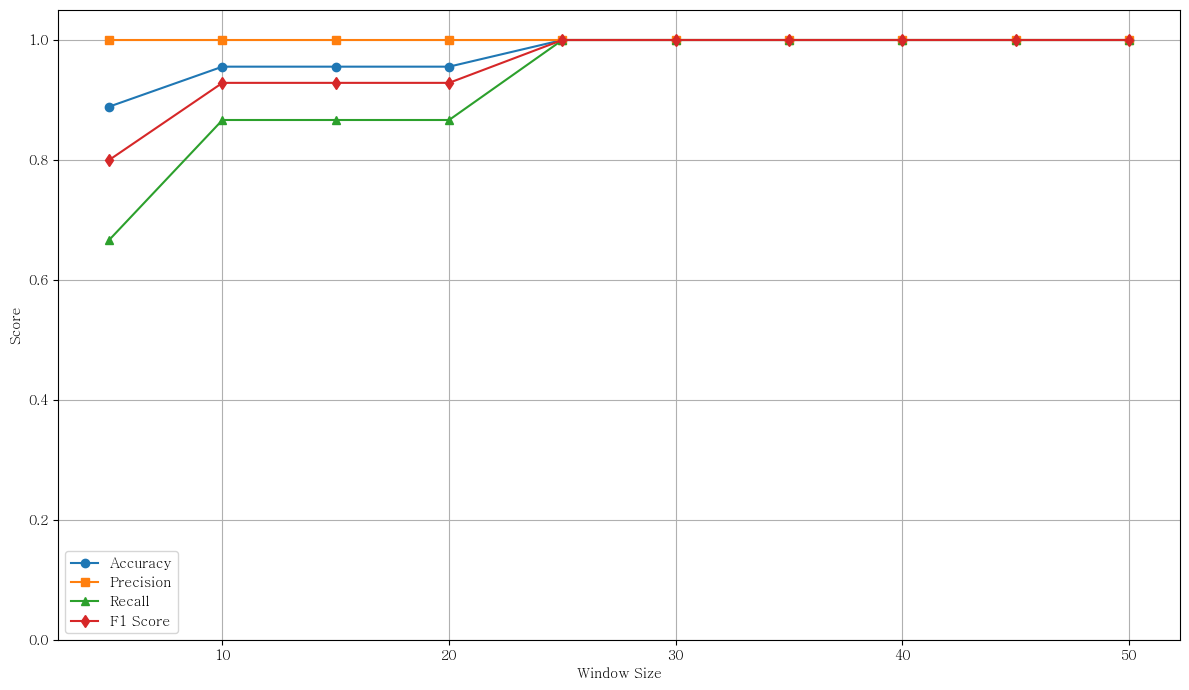

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm

# CSV 파일들이 저장된 폴더 경로
folder_path = './result/check'

# 윈도우 크기 리스트
window_sizes = list(range(5, 55, 5))  # 5부터 50까지 5 간격
file_names = [f'window_{w}_0.85_0.75.csv' for w in window_sizes]

# 결과 저장 리스트
accuracies, precisions, recalls, f1_scores = [], [], [], []

# 그룹 기준 함수
def get_group(filename):
    return filename[:2]

# 각 파일에서 성능 지표 계산
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    try:
        df = pd.read_csv(file_path)
        df['group1'] = df['file1'].apply(get_group)
        df['group2'] = df['file2'].apply(get_group)

        TP = df[(df['group1'] == df['group2']) & (df['label'] == 1)].shape[0]
        FN = df[(df['group1'] == df['group2']) & (df['label'] == 0)].shape[0]
        FP = df[(df['group1'] != df['group2']) & (df['label'] == 1)].shape[0]
        TN = df[(df['group1'] != df['group2']) & (df['label'] == 0)].shape[0]

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)

    except Exception as e:
        accuracies.append(None)
        precisions.append(None)
        recalls.append(None)
        f1_scores.append(None)

# 폰트 설정 (선택적)
font_candidates = ['AppleMyungjo', 'Batang', 'NanumMyeongjo']
selected_font = None
for font in font_candidates:
    if any(font in f.name for f in fm.fontManager.ttflist):
        selected_font = font
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font

# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.plot(window_sizes, accuracies, marker='o', label='Accuracy')
plt.plot(window_sizes, precisions, marker='s', label='Precision')
plt.plot(window_sizes, recalls, marker='^', label='Recall')
plt.plot(window_sizes, f1_scores, marker='d', label='F1 Score')

plt.xlabel('Window Size')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


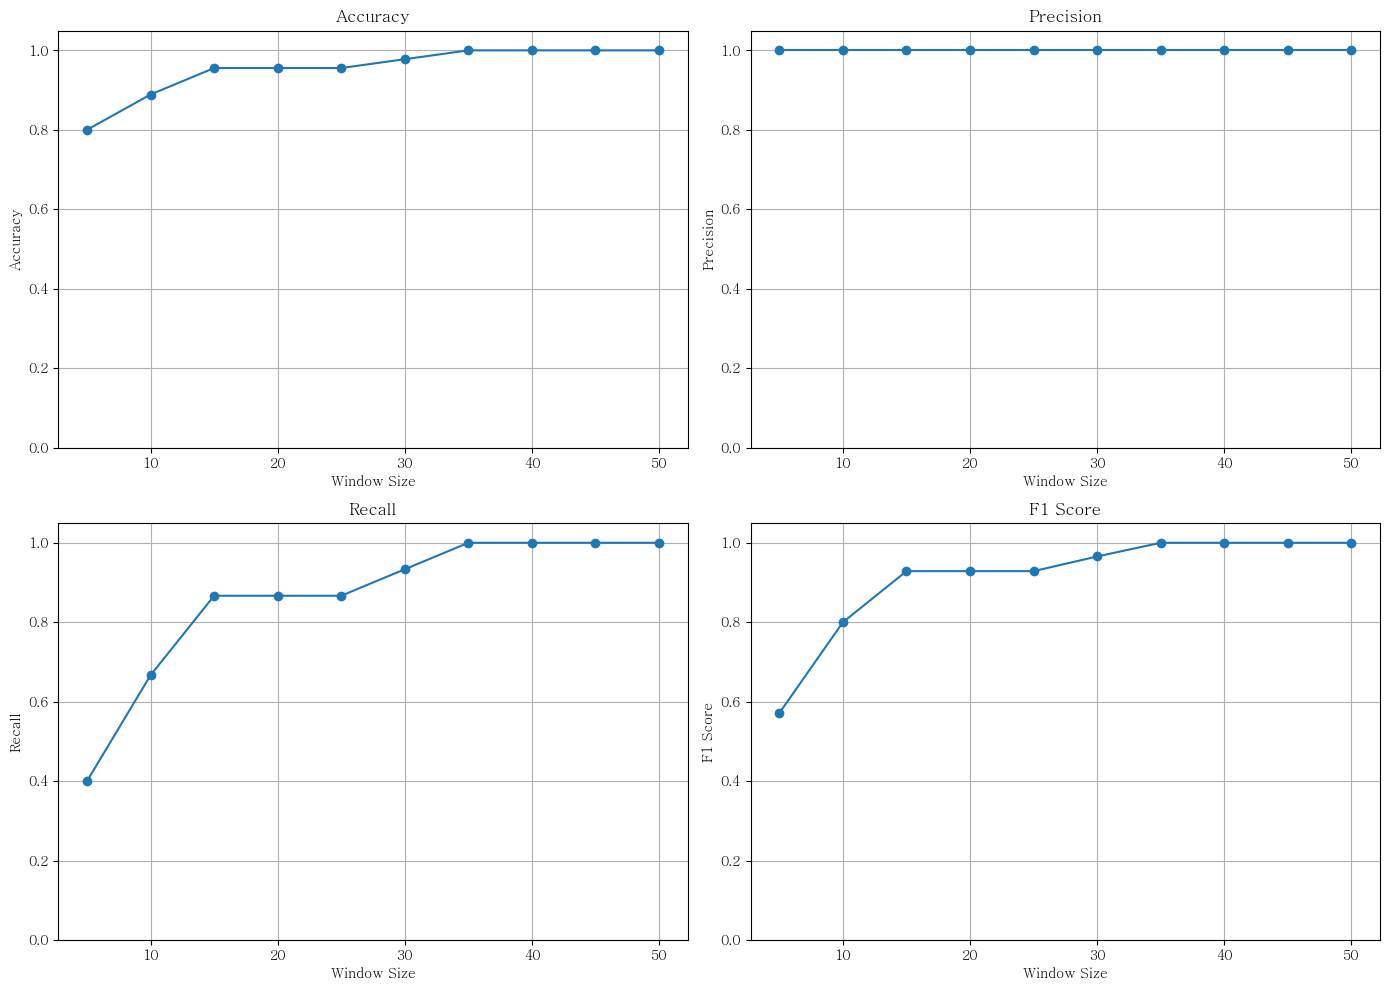

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm

# CSV 파일들이 저장된 폴더 경로
folder_path = './result/check'

# 윈도우 크기 리스트
window_sizes = list(range(5, 55, 5))
file_names = [f'window_{w}_0.85_0.85.csv' for w in window_sizes]

# 결과 저장 리스트
accuracies, precisions, recalls, f1_scores = [], [], [], []

def get_group(filename):
    return filename[:2]

# 성능 지표 계산
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    try:
        df = pd.read_csv(file_path)
        df['group1'] = df['file1'].apply(get_group)
        df['group2'] = df['file2'].apply(get_group)

        TP = df[(df['group1'] == df['group2']) & (df['label'] == 1)].shape[0]
        FN = df[(df['group1'] == df['group2']) & (df['label'] == 0)].shape[0]
        FP = df[(df['group1'] != df['group2']) & (df['label'] == 1)].shape[0]
        TN = df[(df['group1'] != df['group2']) & (df['label'] == 0)].shape[0]

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)

    except Exception as e:
        accuracies.append(None)
        precisions.append(None)
        recalls.append(None)
        f1_scores.append(None)

# 폰트 설정 (한글용)
font_candidates = ['AppleMyungjo', 'Batang', 'NanumMyeongjo']
selected_font = None
for font in font_candidates:
    if any(font in f.name for f in fm.fontManager.ttflist):
        selected_font = font
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font

# Subplot으로 4개 그래프 그리기
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

metrics = [accuracies, precisions, recalls, f1_scores]
titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, ax in enumerate(axs.flat):
    ax.plot(window_sizes, metrics[i], marker='o')
    ax.set_title(titles[i])
    ax.set_xlabel('Window Size')
    ax.set_ylabel(titles[i])
    ax.set_ylim(0, 1.05)
    ax.grid(True)

plt.tight_layout()
plt.show()
